앤드류 응 교수가 배포한 손글씨 이미지(MNIST) 
훈련데이터 6만개, 테스트데이터 1만개

In [ ]:
from PIL import Image
# !pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 라이브러리 목록들 임포트하기
#!pip install tensorflow
#!pip install keras
#!pip install numpy

import tensorflow as tf
import keras
import numpy as np

**케라스로 MNIST 데이터셋 불러오기**

- 손글씨 숫자 인식 용도 데이터셋: 70,000개의 샘플 포함
- 레이블(타깃): 0부터 9까지 10개의 범주(category, class)
- 훈련 세트
    - 모델 학습 용도
    - 샘플: 28x28 픽셀 크기의 이미지 60,000개
- 테스트 세트
    - 학습된 모델 성능 테스트 용도
    - 샘플: 28x28 픽셀 크기의 이미지 10,000개

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('train 데이터 셋 :', train_images.shape, train_labels)
print('test 데이터 셋 :', test_images.shape, test_labels)

train 데이터 셋 : (60000, 28, 28) [5 0 4 ... 5 6 8]
test 데이터 셋 : (10000, 28, 28) [7 2 1 ... 4 5 6]


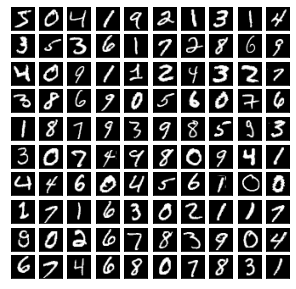

In [ ]:
# train 데이터 모습
import matplotlib.pyplot as plt

row = 10
col = 10
n = row * col
plt.figure(figsize=(5, 5))
for i in range(n):
  ax = plt.subplot(row, col, i+1)
  plt.imshow(train_images[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show() 

#### **인공신경망 모델 만들기**

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))  #784
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**신경망 구조 지정**

신경망의 구조는 다음과 같다.

- 층(layer)
    - 4개의 Dense 층 사용
    - 일종의 __데이터 정제__를 위한 필터 역할 수행
- 층 연결
    - `Sequential` 모델 활용
    - 완전 연결(fully connected). 조밀(densely)하게 연결되었다고 함.
- 1~4 층
    - 512, 256, 128, 64개의 유닛(unit) 사용.
    - 활성화 함수(activation function): 렐루(relu) 함수
- 마지막 층
    - 10개의 유닛 사용. 10개의 범주를 대상으로 해당 범부에 속할 확률 계산.
        모든 확률의 합은 1.
    - 활성화 함수: 소프트맥스(softmax) 함수

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

**신경망 컴파일**

- __옵티마이저__(optimizer): 모델의 성능을 향상시키는 방향으로 가중치를 업데이트하는 알고리즘
- __손실 함수__(loss function): 훈련 중 성능 측정 기준

    - 다중 분류 손실함수. one-hot encoding 클래스

    - 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 one-hot encoding 형태로 구성된다.

- __모니터링 지표__: 훈련과 테스트 과정을 모니터링 할 때 사용되는 평가 지표(metric).

    - 손실 함수값을 사용할 수도 있고 아닐 수도 있음. 
    - 위 코드에서는 정확도(accuracy)만 사용.

**데이터 전처리 작업**

숫자의 크기를 작게 하기 위해 255로 나눠 0~1 사이의 값으로 변환

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
#train_images[0]
train_images.shape

(60000, 784)

In [ ]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255
test_images.shape

(10000, 784)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# 아래에는 훈련데이터의 정답들이 들어있다.
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# one-hot 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

**모델 훈련**

컴파일된 객체 모델을 훈련한다. 

- `fit()` 메서드 호출: 훈련 세트와 레이블을 인자로 사용
- `epoths`: 에포크(전체 훈련 세트 대상 반복 훈련 횟수)
  - 훈련 횟수: 5 회
- `batch_size`: 가중치 업데이트 한 번 실행할 때 사용되는 샘플 수
  - `batch_size`를 지정해주면 미니배치 경사하강법이 된다.(여기선 64의 사이즈)

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 12s 12ms/step - loss: 0.2295 - accuracy: 0.9300
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0976 - accuracy: 0.9720
Epoch 3/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0709 - accuracy: 0.9796
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0585 - accuracy: 0.9841
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0482 - accuracy: 0.9876


**테스트 데이터셋 확인**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9806


In [ ]:
# 테스트 데이터셋 정확도 확인
test_acc

0.9805999994277954

수업을 들을 때 사용한 모델 방식 그대로 진행한 결과 약 97.82%의 정확도가 나왔다.

그렇다면 성능 향상을 위해 밑의 세 가지 중 하나씩 수정해서 진행해보자.
 - 층의 개수와 유닛의 수
 - 훈련 횟수(`epochs`)
 - 배치 사이즈(`batch_size`)

#### **1. 층의 개수와 유닛의 수**

렐루(relu)층의 유닛을 각각 두 배씩 늘렸다.

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(28*28, )))  #784
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
____________________________________________

In [ ]:
model1.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model1.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.2512 - accuracy: 0.9256
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.1114 - accuracy: 0.9712
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0910 - accuracy: 0.9771
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0808 - accuracy: 0.9805
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0728 - accuracy: 0.9841


**테스트 데이터셋 확인**

In [ ]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.1931 - accuracy: 0.9650


In [ ]:
# 테스트 데이터셋 정확도 확인
test_acc

0.9649999737739563

model1(`relu`층 추가 및 두 배의 유닛)은 약 97.75%의 정확도를 보이고 있다.

`Sequential`모델 설정 후 `model.fit`을 여러 번 진행해보면 점수가 약간 올라가거나 내려가는 것을 확인할 수 있다.

결론적으로 말하자면 정확도가 늘어나야겠지만 별 차이가 없다.

아마 충분한 훈련(`epochs` = 5)이 되지않기 때문에 그럴 것이다.

그렇다면 이제 두 번째로 훈련 횟수를 늘려보자.

#### **2. 훈련 횟수(epochs)**

첫 번째 모델 기준으로 훈련 횟수를 20번으로 수정.

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))  #784
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model2.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 12s 12ms/step - loss: 0.2297 - accuracy: 0.9298
Epoch 2/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0965 - accuracy: 0.9724
Epoch 3/20
938/938 [==============================] - 12s 12ms/step - loss: 0.0710 - accuracy: 0.9801
Epoch 4/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0564 - accuracy: 0.9841
Epoch 5/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0478 - accuracy: 0.9871
Epoch 6/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0434 - accuracy: 0.9893
Epoch 7/20
938/938 [==============================] - 12s 12ms/step - loss: 0.0381 - accuracy: 0.9911
Epoch 8/20
938/938 [==============================] - 12s 12ms/step - loss: 0.0355 - accuracy: 0.9917
Epoch 9/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0345 - accuracy: 0.9919
Epoch 10/20
938/938 [==============================] - 11s 12ms/step - loss: 0.034

**테스트 데이터셋 확인**

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2786 - accuracy: 0.9800


In [ ]:
# 테스트 데이터셋 정확도 확인
test_acc

0.9800000190734863

훈련 횟수가 20번(4배)으로 학습하니 약 97.92%의 정확도를 보이고 있다.

주목해야 할 점은 `model.fit`에서 20번 째 학습이 0.9944의 `accuracy`를 보이고 있다.

확실히 훈련 횟수는 정확도를 올리는 데 영향을 끼친다.

#### **3. 배치 사이즈(batch_size)**

첫 번째 모델 기준으로 배치 사이즈의 크기를 100으로 수정.

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))  #784
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [ ]:
model3.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2720 - accuracy: 0.9151
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0946 - accuracy: 0.9721
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0651 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0488 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0376 - accuracy: 0.9884


**테스트 데이터셋 확인**

미니배치 경사하강법은 배치 경사하강법에서 데이터를 전부 쓸 것을 배치 사이즈만큼 나눠 학습한다.

즉, 늘리는 것보다 줄이는 것의 적절한 선을 찾아야 한다.

In [ ]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9729


In [ ]:
# 테스트 데이터셋 정확도 확인
test_acc

0.9728999733924866

정확도는 약 97.76%

기존 첫 번째 모델과 비교하였을 때, 정확도가 좀 더 큰 폭으로 오르는 것을 확인할 수 있다.

사실 이 모델같은 경우도 훈련 횟수에 큰 영향을 받는다.

그러면 수정해보았던 세 개의 방법을 다 한꺼번에 진행해보자.

#### **4. 수정 통합 모델**

In [ ]:
model0 = models.Sequential()
model0.add(layers.Dense(1024, activation='relu', input_shape=(28*28, )))  #784
model0.add(layers.Dense(512, activation='relu'))
model0.add(layers.Dense(256, activation='relu'))
model0.add(layers.Dense(128, activation='relu'))
model0.add(layers.Dense(10, activation='softmax'))

In [ ]:
model0.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 1,494,154
Trainable params: 1,494,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model0.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model0.fit(train_images, train_labels, epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 22s 35ms/step - loss: 0.2461 - accuracy: 0.9250
Epoch 2/20
600/600 [==============================] - 21s 35ms/step - loss: 0.0974 - accuracy: 0.9719
Epoch 3/20
600/600 [==============================] - 21s 35ms/step - loss: 0.0709 - accuracy: 0.9799
Epoch 4/20
600/600 [==============================] - 21s 36ms/step - loss: 0.0602 - accuracy: 0.9845
Epoch 5/20
600/600 [==============================] - 21s 36ms/step - loss: 0.0519 - accuracy: 0.9869
Epoch 6/20
600/600 [==============================] - 22s 36ms/step - loss: 0.0466 - accuracy: 0.9884
Epoch 7/20
600/600 [==============================] - 22s 36ms/step - loss: 0.0444 - accuracy: 0.9898
Epoch 8/20
600/600 [==============================] - 21s 35ms/step - loss: 0.0401 - accuracy: 0.9907
Epoch 9/20
600/600 [==============================] - 21s 35ms/step - loss: 0.0386 - accuracy: 0.9917
Epoch 10/20
600/600 [==============================] - 20s 33ms/step - loss: 0.036

**테스트 데이터셋 확인**

In [ ]:
test_loss, test_acc = model0.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2682 - accuracy: 0.9781


In [ ]:
# 테스트 데이터셋 정확도 확인
test_acc

0.9781000018119812

기존 모델의 마지막 훈련 `accuracy` : 0.9871

통합 모델의 마지막 훈련 `accuracy` : 0.9958

평가값도 약 98.18%로 확실히 성능이 좋아진 것을 확인할 수 있었다.

### tensorflow로 CNN구현하기(MNIST)

tensorflow를 이용해서 여러개의 레이어를 쌓고 그것을 통해 MNIST 손글씨 숫자인식을 구현했다. 하지만 테스트 세트에서의 정확도는 그렇게 증가하지 않았다.

그래서 **CNN(Convolutional Neural Network)**을 통해 더욱 높은 정확도를 구현해보도록 하자.



기본적으로 CNN이란 이전의 일반적인 네트워크랑 달리 필터라는 것을 사용하는데, 이미지는 사실 2차원으로 구성된 데이터이기 때문에 이를 1차원으로 나열하면 이미지의 특성을 알아차리기 쉽지 않다.

2차원의 특성을 살리고자 CNN모델이 개발이 되었고 어떻게 구현하는지 살펴보도록 하자.

---

우선 가장 기본적인 모델로 **Convolutional Layer**와 **Pooling Layer**를 두개를 연달아 놓습니다.

 - **Convolutional Layer** - 일정 크기의 필터를 Striding하면서 계산한 결과를 모아놓은 것(Striding : 한칸씩 옆으로 이동)

 - **Pooling Layer** - 예를 들어 2x2필터라면 그중 가장 큰 값을 취하여 크기를 줄이는 Layer.

사용하는 이유는 앞선 Convolution Layer를 통과시키면 feature가 늘어나
연산량이 굉장히 크게 늘어나는데 그렇게 되면 Overfitting 가능성이 늘어나기 때문에 이를 줄이기 위함입니다.

또한 구간별로 가장 강한 특징만 뽑기 위함도 있습니다.

이후에는 ReLU로 Activation function을 이용하여 출력을 내보내면, Fully Connected Layer를 사용할 수 있고 10개의 출력을 통해 0~9를 표현하게 됩니다.

마무리로 값을 softmax로 어떤 숫자가 나올지 결정하게 됩니다.

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
import numpy as np
import keras
import sys

np.random.seed(7)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)

train_images shape: (60000, 28, 28, 1)
test_images shape: (10000, 28, 28, 1)


In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_cnn.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(1024, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)             

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result = model_cnn.fit(train_images, train_labels,
                 batch_size=100,
                 epochs=20,
                 verbose=1, 
                 validation_data=(test_images, test_labels))

Epoch 1/20
600/600 [==============================] - 109s 181ms/step - loss: 0.1714 - accuracy: 0.9464 - val_loss: 0.0481 - val_accuracy: 0.9838
Epoch 2/20
600/600 [==============================] - 109s 182ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0364 - val_accuracy: 0.9881
Epoch 3/20
600/600 [==============================] - 109s 181ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0376 - val_accuracy: 0.9871
Epoch 4/20
600/600 [==============================] - 109s 182ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0289 - val_accuracy: 0.9897
Epoch 5/20
600/600 [==============================] - 106s 177ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0203 - val_accuracy: 0.9926
Epoch 6/20
600/600 [==============================] - 110s 183ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0236 - val_accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 107s 178ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0241 -

In [ ]:
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels, verbose=0)

In [ ]:
# 테스트 데이터셋 손실, 정확도 확인
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.027287648990750313
Test accuracy: 0.9939000010490417
